In [39]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [40]:
import sklearn
from sklearn import datasets
import pandas as pd
from ydata_profiling import ProfileReport  # установка: conda install -c conda-forge ydata-profiling 

In [41]:
data = datasets.fetch_openml(name='banknote-authentication', version=1, parser='auto', data_home='datasets', 
                          as_frame=True)  #  return_X_y=True

In [42]:
data.DESCR

'Author: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe)  \nSource: [UCI](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) - 2012  \nPlease cite: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html) \n\nDataset about distinguishing genuine and forged banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images.\n\n### Attribute Information  \n\nV1. variance of Wavelet Transformed image (continuous)  \nV2. skewness of Wavelet Transformed image (continuous)  \nV3. curtosis of Wavelet Transformed image (continuous)  \nV4. entropy of image (continuous)  \n\nClass (target). Presumably 

In [43]:
X=data.data
Y=data.target
Y=Y.apply(int)   # преобразуем '1' и '2' -> 1 и 2

Объединим данные X,Y

In [44]:
Z=X.copy()
Z['Y']=Y

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
Z_train, Z_test = train_test_split(Z, test_size=0.2, random_state=0)   # разделим в на обучение/тест в пропорции 80/20%.
len(Z), len(Z_train), len(Z_test)

(1372, 1097, 275)

In [47]:
def XY_split(Z):
    '''Функция разбиения по признаки и отклики'''
    Y = Z['Y']
    X = Z.copy()
    X = X.drop('Y',axis=1)
    return X,Y

X_train, Y_train = XY_split(Z_train)
X_test, Y_test = XY_split(Z_test)

In [48]:
X_train.columns, X_test.columns    # проверим, что Y не содержится

(Index(['V1', 'V2', 'V3', 'V4'], dtype='object'),
 Index(['V1', 'V2', 'V3', 'V4'], dtype='object'))

# Анализ данных

In [49]:
# можем анализировать только обучающую выборку
Z=Z_train
X=X_train
Y=Y_train

In [50]:
Y.describe()

count     1097
unique       2
top          1
freq       605
Name: Y, dtype: int64

In [51]:
(Y==1).sum(), (Y==2).sum()

(605, 492)

In [52]:
# проверим разброс признаков по std
# а также отсутствие аномально больших и малых значений признаков
X.describe()  

,V1,V2,V3,V4
count,1097.000000,1097.000000,1097.000000,1097.000000
mean,0.419462,1.879217,1.385735,-1.174015
std,2.846426,5.797654,4.247798,2.088414
min,-7.042100,-13.773100,-5.286100,-7.785300
25%,-1.759900,-1.777500,-1.491200,-2.372400
50%,0.473680,2.313400,0.562650,-0.562100
75%,2.796100,6.708600,3.176900,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [53]:
Z.dtypes

V1     float64
V2     float64
V3     float64
V4     float64
Y     category
dtype: object

In [54]:
Z

,V1,V2,V3,V4,Y
1326,-1.29430,2.673500,-0.840850,-2.032300,2
1109,-0.40857,3.097700,-2.960700,-2.689200,2
1139,-1.52280,-6.478900,5.756800,0.873250,2
657,-0.27800,8.188100,-3.133800,-2.527600,1
704,3.70220,6.994200,-1.851100,-0.128890,1
...,...,...,...,...,...
763,0.39012,-0.142790,-0.031994,0.350840,2
835,-0.94255,0.039307,-0.241920,0.315930,2
1216,0.60050,0.999450,-2.212600,0.097399,2
559,2.01650,-0.252460,5.170700,1.076300,1


In [55]:
Y

1326    2
1109    2
1139    2
657     1
704     1
       ..
763     2
835     2
1216    2
559     1
684     1
Name: Y, Length: 1097, dtype: category
Categories (2, int64): [1, 2]

# Отчет о данных

In [56]:
profile = ProfileReport(Z,config_file='')  # обзор возможностей: https://docs.profiling.ydata.ai/4.5/

In [57]:
profile.to_widgets();  # результаты можно экспортировать в HTML командой profile.to_file("your_report.html")
# если не работает, то просто отобразим переменную profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Все попарные зависимости

In [58]:
cmap = matplotlib.colors.ListedColormap(['r', 'b'])  # 'r' для класса 1; 'b' для класса 2

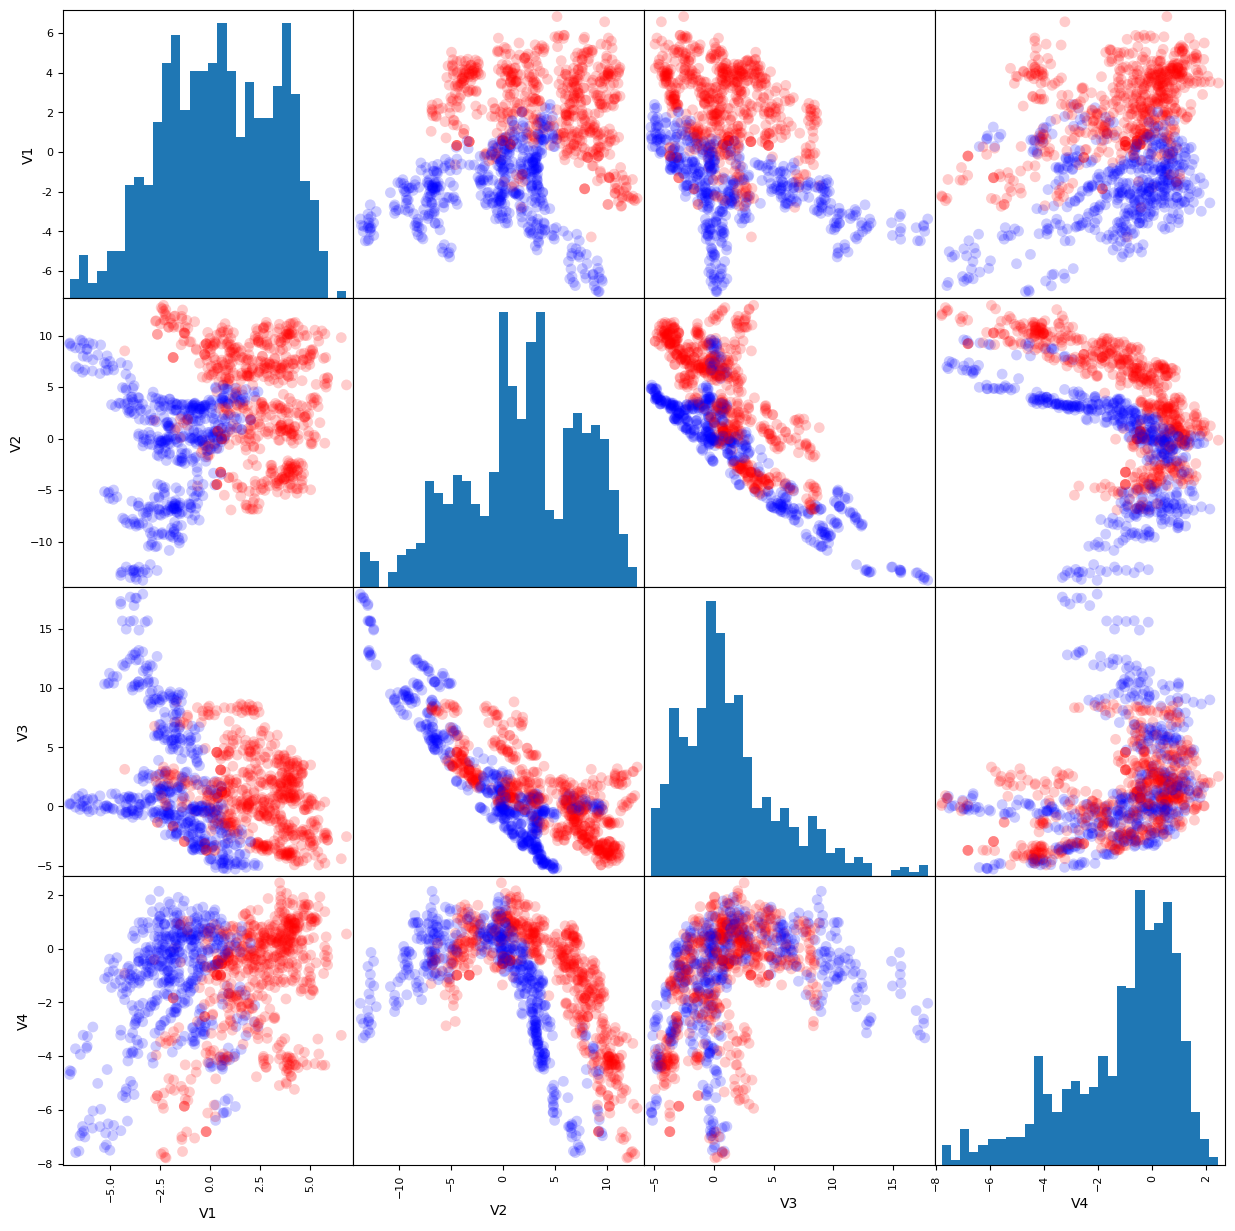

In [59]:
grr = pd.plotting.scatter_matrix(X, c=Y, figsize=(15, 15), marker='o',
hist_kwds={'bins': 30}, s=60, alpha=.2, cmap=cmap)  

# Индивидуальная зависимость от двух переменных

## Без обозначений класса

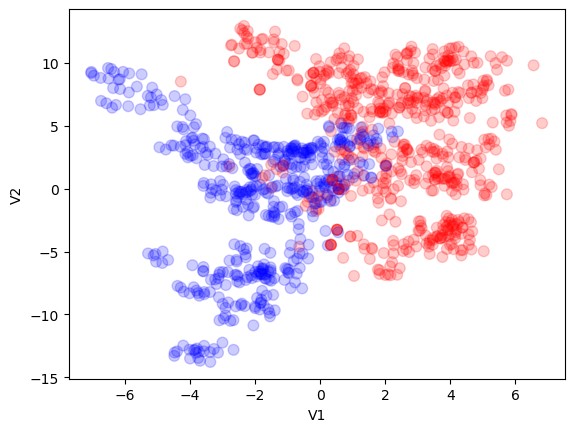

In [60]:
plt.scatter(Z['V1'],Z['V2'], c=Y, cmap=cmap, marker='o', s=60, alpha=.2)
plt.xlabel('V1')
plt.ylabel('V2');

## С обозначениями класса

In [61]:
list(zip([1,2],['r', 'b']))

[(1, 'r'), (2, 'b')]

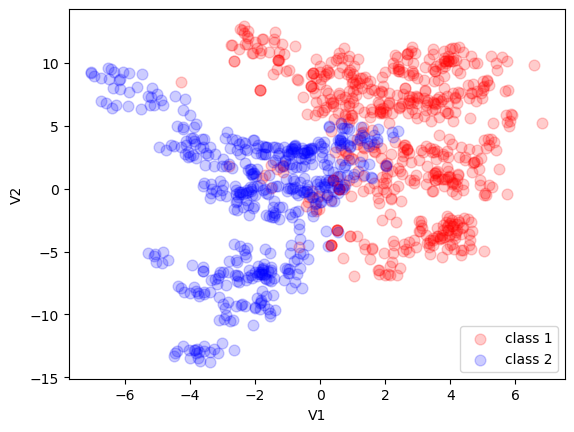

In [62]:
for cls,color in zip([1,2],['r', 'b']):
    plt.scatter(Z.loc[Y==cls,'V1'], Z.loc[Y==cls,'V2'], marker='o', color=color, s=60, alpha=.2, label=f'class {cls}')
plt.xlabel('V1')
plt.ylabel('V2')
gca().legend(loc="lower right");

# Индивидуальная зависимость от одной переменной

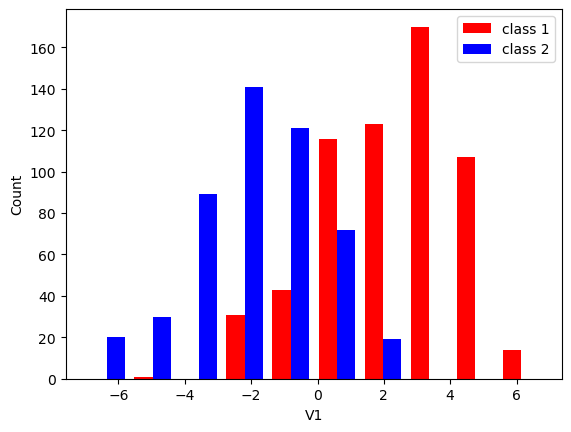

In [63]:
plt.hist([Z.loc[Y==1,'V1'], Z.loc[Y==2,'V1']], color=['r', 'b'], label=['class 1', 'class 2'])
plt.xlabel('V1')
plt.ylabel('Count')
plt.legend()
plt.show()

### Определим функцию для 3D визуализаций:

In [64]:
def plot3d(var1,var2,var3):
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(projection='3d')
    ax.scatter(Z[var1], Z[var2], Z[var3], c=Z['Y'], cmap=cmap)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_zlabel(var3)
    plt.show()

Более экономичная визуализация, но без интерактивности:

In [65]:
%matplotlib inline   

Более ресурсоёмкая визуализация, зато интерактивная

In [66]:
%matplotlib widget   

Интерактивная визуализация в отдельном окне:

Попробуем визуализации в разных осях:

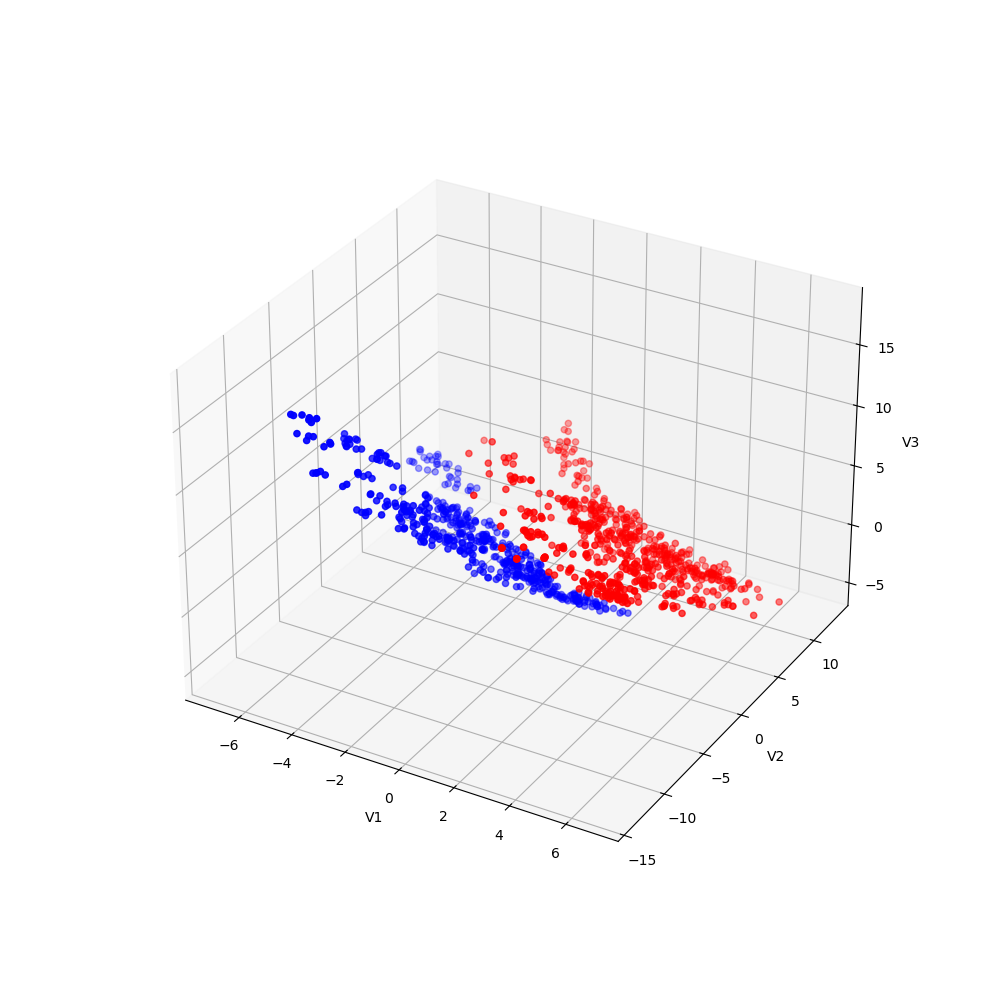

In [67]:
#plot3d('V2','V3','V4')  # неполная разделимость
plot3d('V1','V2','V3')   # классы хорошо разделяются

# Метрические методы прогнозирования

In [68]:
from sklearn import neighbors
from sklearn import metrics

## Метод ближайших центроидов

In [69]:
model = sklearn.neighbors.NearestCentroid()
model.fit(X_train,Y_train);
Y_hat = model.predict(X_test)

In [70]:
acc = sklearn.metrics.accuracy_score(Y_test, Y_hat)
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.75


In [71]:
print(sklearn.__version__)

1.5.1


In [72]:
cm = sklearn.metrics.confusion_matrix(Y_test, Y_hat)
cm

array([[123,  34],
       [ 34,  84]])

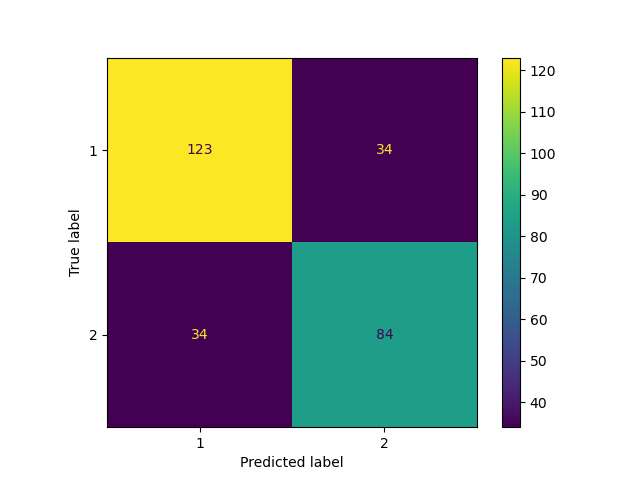

In [73]:
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

In [74]:
model = sklearn.neighbors.NearestCentroid()
model.fit(X_train,Y_train);
Y_hat = model.predict(X_test)

In [75]:
def show_accuracy(Y_test, Y_hat):
    acc = sklearn.metrics.accuracy_score(Y_test, Y_hat)
    print(f'Accuracy: {acc:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(Y_test, Y_hat)   # матрица счётчиков true_class x predicted_class

    disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot();

Accuracy: 0.75


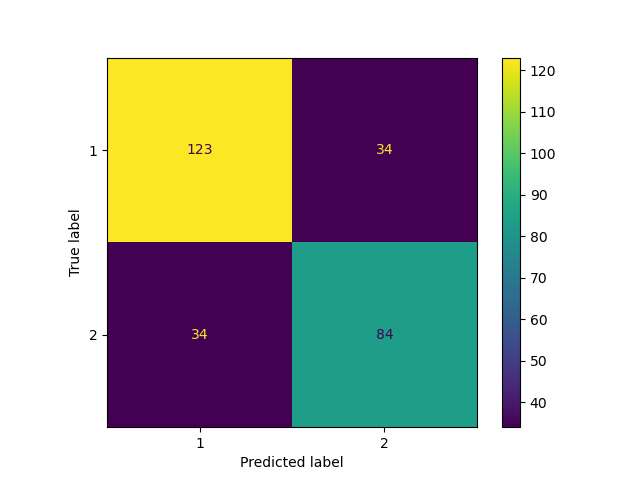

In [76]:
show_accuracy(Y_test, Y_hat)

## Метод ближайших соседей

In [77]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=100)
model.fit(X_train,Y_train);
Y_hat = model.predict(X_test)

Accuracy: 0.98


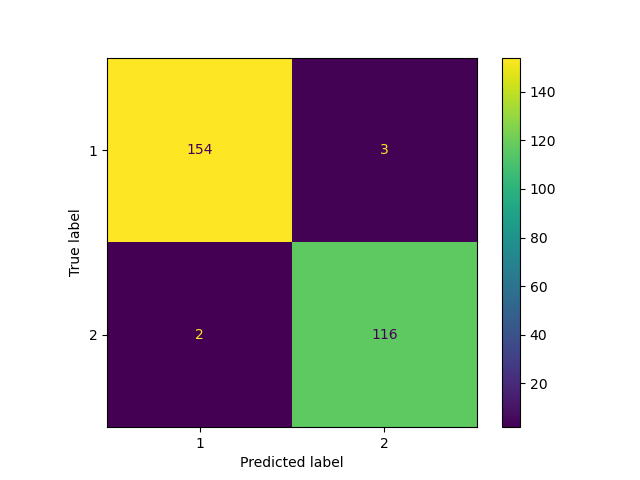

In [78]:
show_accuracy(Y_test, Y_hat)

In [79]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,Y_train);
Y_hat = model.predict(X_test)

Accuracy: 1.00


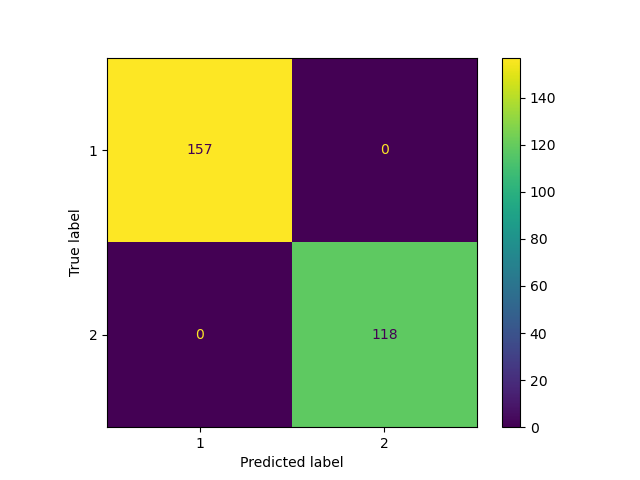

In [80]:
show_accuracy(Y_test, Y_hat)